In [4]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display
import random
import torchvision
import warnings
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
from PIL import Image
import pathlib
import csv
# sklearn Preprocessing
from sklearn.model_selection import train_test_split
#Keras
import keras
import warnings
warnings.filterwarnings('ignore')
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras.optimizers import SGD

In [ ]:
recordings = 'test train'.split()
for g in recordings:
     pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
     for filename in os.listdir(f'./drive/My Drive/recordings/{g}'):
        songname = f'./drive/My Drive/recordings/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=1)
        print(y.shape)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='plasma', sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

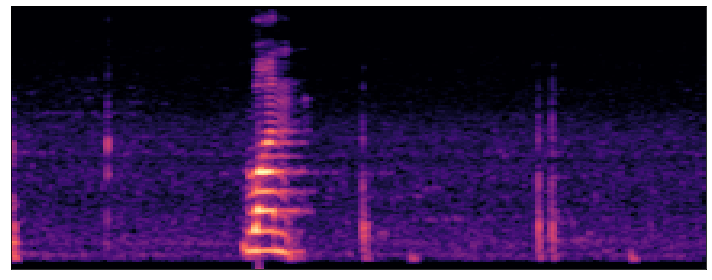

<Figure size 432x288 with 0 Axes>

In [359]:
y, sr = librosa.load('C:/Users/vamr/Desktop/dnn_pytorch/one.wav')
librosa.feature.melspectrogram(y=y, sr=sr)
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                   fmax=8000)
plt.figure(figsize=(10,4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sr,
                         fmax=8000)
plt.tight_layout()
plt.show()

plt.savefig('C:/Users/vamr/Desktop/dnn_pytorch/one.png')

In [10]:
test_dataset=torchvision.datasets.ImageFolder(root='C:/Users/vamr/Desktop/dnn_pytorch/content/img_data/test', transform=transforms.ToTensor())
train_dataset=torchvision.datasets.ImageFolder(root='C:/Users/vamr/Desktop/dnn_pytorch/content/img_data/train', transform=transforms.ToTensor())

                



In [372]:
test=torchvision.datasets.ImageFolder('C:/Users/vamr/Desktop/dnn_pytorch',transform=transforms.ToTensor())
x,y=test[0]
x.size()


torch.Size([3, 288, 720])

In [34]:
x,y=train_dataset[0]
len(train_dataset[0][0][0][0])

720

In [36]:
len(x[0][0])

720

In [26]:
y

0

In [49]:
int(58.4)

58

In [93]:
batch_size = 50
n_iters = 1000
num_epochs = 34

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
train_dataset[500]   
#x,y=test_dataset[3] 

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]), 3)

In [94]:
print(len(train_dataset[0][0][0][0]))

720


In [95]:
x,y=train_dataset[0]

In [96]:
  class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=7, stride=3, padding=3)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=7, stride=3, padding=3)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 8 * 20, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

In [97]:
model = CNNModel()

In [98]:
criterion = nn.CrossEntropyLoss()

In [99]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [100]:
list(model.parameters())[1].size()

torch.Size([16])

In [101]:
list(model.parameters())[2].size()

torch.Size([32, 16, 7, 7])

In [102]:
list(model.parameters())[3].size()

torch.Size([32])

In [103]:
list(model.parameters())[4].size()

torch.Size([10, 5120])

In [104]:
list(model.parameters())[5].size()

torch.Size([10])

In [105]:
iter = 0
for p in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images)
            labels = Variable(labels)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images
                images = images.requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 50. Loss: 2.271263360977173. Accuracy: 20
Iteration: 100. Loss: 2.091552495956421. Accuracy: 26
Iteration: 150. Loss: 1.8715957403182983. Accuracy: 63
Iteration: 200. Loss: 1.5536317825317383. Accuracy: 60
Iteration: 250. Loss: 1.1282203197479248. Accuracy: 76
Iteration: 300. Loss: 0.6993736624717712. Accuracy: 66
Iteration: 350. Loss: 0.93623948097229. Accuracy: 83
Iteration: 400. Loss: 0.3518825173377991. Accuracy: 93
Iteration: 450. Loss: 0.38433822989463806. Accuracy: 90
Iteration: 500. Loss: 0.15461857616901398. Accuracy: 90
Iteration: 550. Loss: 0.2284531146287918. Accuracy: 93
Iteration: 600. Loss: 0.15236902236938477. Accuracy: 86
Iteration: 650. Loss: 0.19218643009662628. Accuracy: 96
Iteration: 700. Loss: 0.11026164889335632. Accuracy: 96
Iteration: 750. Loss: 0.0728703960776329. Accuracy: 90
Iteration: 800. Loss: 0.0996185764670372. Accuracy: 93
Iteration: 850. Loss: 0.19642087817192078. Accuracy: 96
Iteration: 900. Loss: 0.045477934181690216. Accuracy: 90
Iterati

In [277]:
 for i, (images,labels) in enumerate(train_loader):
        print(i)
        print(labels)
        print(type(images))
        print(len(images))
        print(type(images[0]))
        print(len(images[0]))
        print(type(images[0][0]))
        print(len(images[0][0]))

0
tensor([3, 7, 0, 9, 2, 2, 0, 4, 8, 4, 1, 6, 5, 9, 1, 6, 2, 1, 1, 8, 3, 6, 5, 5,
        6, 6, 5, 5, 0, 0, 9, 4, 5, 2, 1, 4, 5, 0, 1, 8, 4, 1, 7, 8, 3, 9, 0, 4,
        3, 2])
<class 'torch.Tensor'>
50
<class 'torch.Tensor'>
3
<class 'torch.Tensor'>
288
1
tensor([7, 1, 9, 8, 1, 0, 7, 7, 3, 6, 4, 7, 3, 0, 3, 4, 1, 2, 5, 6, 7, 5, 3, 1,
        0, 5, 8, 8, 4, 6, 3, 2, 4, 9, 4, 0, 9, 0, 7, 9, 2, 5, 5, 6, 8, 5, 9, 2,
        3, 8])
<class 'torch.Tensor'>
50
<class 'torch.Tensor'>
3
<class 'torch.Tensor'>
288
2
tensor([6, 2, 2, 6, 4, 7, 3, 9, 9, 4, 7, 5, 0, 6, 8, 7, 1, 6, 5, 1, 6, 0, 7, 3,
        0, 3, 0, 6, 9, 7, 1, 5, 2, 7, 4, 4, 1, 4, 1, 6, 7, 2, 2, 1, 0, 1, 2, 0,
        5, 1])
<class 'torch.Tensor'>
50
<class 'torch.Tensor'>
3
<class 'torch.Tensor'>
288
3
tensor([0, 8, 4, 9, 7, 8, 0, 7, 7, 9, 9, 3, 7, 3, 7, 1, 9, 9, 0, 9, 3, 0, 9, 4,
        2, 3, 2, 6, 0, 3, 1, 7, 9, 8, 6, 2, 0, 2, 8, 3, 5, 3, 3, 0, 1, 6, 7, 4,
        2, 5])
<class 'torch.Tensor'>
50
<class 'torch.Tensor'>
3
<class 

In [355]:
x,y=train_dataset[1469]
print((x).size())
x=x.unsqueeze_(0)
print((x).size())

torch.Size([3, 288, 720])
torch.Size([1, 3, 288, 720])


In [373]:
x=x.unsqueeze_(0)
print((x).size())

torch.Size([1, 3, 288, 720])


In [374]:
x=Variable(x)
y_pred=model(x)

In [375]:
_, predicted = torch.max(y_pred.data, 1)

In [376]:
predicted

tensor([0])

In [335]:
y

9

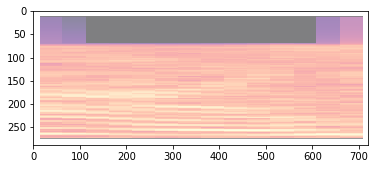

In [351]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images = dataiter.next()

# show images
# print(images[0])
imshow(torchvision.utils.make_grid(images[0][0]))